In [2]:
import seaborn as sb
import random
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
#Generate a list random numbers from 0 to 200, 500 times, save it as a data frame under the column "Value"
# s = pd.DataFrame({'value':[random.randint(0, 200) for i in range(0, 500)]})
# print(s.head())

## First Lets extract the keywords from the csv

In [3]:
!pip install rake-nltk
from rake_nltk import Rake

In [4]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
# import nltk
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [6]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
ml_data = pd.read_csv("ML_engineer_175.csv")
ds_data = pd.read_csv("Data_Scientist_175.csv")

In [8]:
ml_data.iloc[9]['skills']

"b'Regularization methods: Lasso, Ridge|Ensemble methods: Random Forest, Boosting|Time Series Analysis: Auto-regression, ARIMA, Kalman filter, etc.|Random graphs modeling|Support Vector Machines and regression|Decision trees.|We are growing very fast. We are one of the first entrants in this field. We have just started and the sky is the limit for the industry problem we are solving. With us, you will get to work on building some advanced solutions. You will gain great experience in a short amount of time. Besides, you will get to work in a research-oriented, flexible and extremely friendly environment.'"

In [9]:
list_of_stopwords=['work','computer science','machine learning','data','working','collaborate',"''",'ability','engineering','3','mathematics','learn','degree','algorithms','research','etc','variety','design','production','master','build','.|','part','fast','product','business','science','knowledge','develop','analysis','x99s','sets','development','2','analytics','plus','stakeholders','problems','bachelor','familiarity','models','proficiency','related field','self',')|','understand','tools','well','operations','non','solving','sources','phd','5','end','analyze','quality','building','scientists','dental','big','members','equivalent','java','problem','strong','advanced','related field','machine','learning','statistical','ml','required','preferred','software','using','large','related','teams','industry','regression','solutions','support','modeling','techniques','use','improve','collaboration','applied','recommendations','time','one','developing','partners','impact','understanding','scientist','fluency','deep','computer','field','frameworks','least','series','predictive','systems','create','new','concepts','across','engineers','scale','apply','technologies','methods','quantitative field','quantitative','field','processes','testing','real','analytical','implement','infrastructure','including','organization','packages','marketing','able','products','ensure','identify','make','applications','environment','ai','classification','opportunities','deploying','pipelines','driven','similar','demonstrated','professional','insights','performance','cross','.)','programming','customers','test','high','drive','company','approaches','hands','audiences','results','model','various','ms','accurate','passion','solid','languages','decisions','training','communicate','language','functional','collaborative','solve','internal','complex','match','excellent','good','application','1','implementation','must','existing','clients','help','closely','information','areas','communication','written','projects','supply','chain','supply chain','oriented','translate','processing','verbal','planning','deliver','take','statistics','visualization','vision','clustering','optimization','year','c']

In [10]:
r=Rake(    
    stopwords = stopwords.words('english') + list_of_stopwords+['years','team','g','e','bonus','x80','xe2','experience','b','long', 'descriptive', 'text', 'contains', 'technical', 'skills', 'keywords', 'things', 'see', 'rake', 'need', 'many', 'lists', 'let', 'extract']
)

In [11]:
total_keywords = []

In [12]:
# total_keywords = []
for i in range(ml_data.shape[0]):
    #print(data.iloc[i]['company'])
    try:
        r.extract_keywords_from_text(ml_data.iloc[i]['skills'].lower())
#         r.extract_keywords_from_text(ml_data.iloc[i]['description'].lower())
        keywords = r.get_ranked_phrases()
        total_keywords = total_keywords + keywords
    except:
        pass
    

In [13]:
for i in range(ds_data.shape[0]):
    #print(data.iloc[i]['company'])
    try:
        r.extract_keywords_from_text(ds_data.iloc[i]['skills'].lower())
#         r.extract_keywords_from_text(ds_data.iloc[i]['description'].lower())
        keywords = r.get_ranked_phrases()
        total_keywords = total_keywords + keywords
    except:
        pass
    

In [14]:
len(total_keywords)

17451

In [15]:
ml_data.shape[0]

175

In [202]:
# list_of_stopwords=['work','computer science','machine learning','data','working','collaborate',"''",'ability','engineering','3','mathematics','learn','degree','algorithms','research','etc','variety','design','production','master','build','.|','part','fast','product','business','science','knowledge','develop','analysis','x99s','sets','development','2','analytics','plus','stakeholders','problems','bachelor','familiarity','models','proficiency','related field','self',')|','understand','tools','well','operations','non','solving','sources','phd','5','end','analyze','quality','building','scientists','dental','big','members','equivalent','java','problem','strong','advanced','related field','machine','learning','statistical','ml','required','preferred','software','using','large','related','teams','industry','regression','solutions','support','modeling','techniques','use','improve','collaboration','applied','recommendations','time','one','developing','partners','impact','understanding','scientist','fluency','deep','computer','field','frameworks','least','series','predictive','systems','create','new','concepts','across','engineers','scale','apply','technologies','methods','quantitative field','quantitative','field','processes','testing','real','analytical','implement','infrastructure','including','organization','packages','marketing','able','products','ensure','identify','make','applications','environment','ai','classification','opportunities','deploying','pipelines','driven','similar','demonstrated','professional','insights','performance','cross','.)','programming','customers','test','high','drive','company','approaches','hands','audiences','results','model','various','ms','accurate','passion','solid','languages','decisions','training','communicate','language','functional','collaborative','solve','internal','complex','match','excellent','good','application','1','implementation','must','existing','clients','help','closely','information','areas','communication','written','projects','supply','chain','supply chain','oriented','translate','processing','verbal','planning','deliver','take']

In [186]:
# if 'projects' in list_of_stopwords:
#     print("True")

In [16]:
sample = pd.DataFrame({
     "Keyword":total_keywords
})

In [17]:
sample[sample['Keyword']=='communication'].count()

Keyword    0
dtype: int64

In [18]:
sample.value_counts().sort_values(ascending=False)[:17]

Keyword   
python        229
r             107
sql           100
tensorflow     64
pytorch        62
spark          56
tableau        39
nlp            33
scikit         33
hadoop         33
scala          32
pandas         31
aws            29
git            28
mining         28
numpy          27
kubernetes     26
dtype: int64

In [296]:
# sample.value_counts().sort_values(ascending=False)[:17].to_dict()

In [19]:
keyword_list = sample.value_counts().sort_values(ascending=False)[:17].to_dict()

In [295]:
# for i in keyword_list.keys():
#     print(i[0])

In [20]:
final_keywords={}
for old_key in keyword_list.keys():
#     new_key = old_key.replace("'","").replace("(","").replace(")","").replace(",","")
#     new_key = re.sub('[^0-9a-zA-Z]+', '', old_key)
    new_key = old_key[0]
    final_keywords[new_key] = keyword_list[old_key]
    

In [21]:
final_keywords

{'python': 229,
 'r': 107,
 'sql': 100,
 'tensorflow': 64,
 'pytorch': 62,
 'spark': 56,
 'tableau': 39,
 'nlp': 33,
 'scikit': 33,
 'hadoop': 33,
 'scala': 32,
 'pandas': 31,
 'aws': 29,
 'git': 28,
 'mining': 28,
 'numpy': 27,
 'kubernetes': 26}

In [25]:
import csv
# my_dict = {'1': 'aaa', '2': 'bbb', '3': 'ccc'}
header = ['Keyword','Frequency']
with open('Keywords.csv', 'w') as f:
    f.write("%s,%s\n"%(header[0],header[1]))
    for key in final_keywords.keys():
        f.write("%s,%s\n"%(key,final_keywords[key]))

In [26]:
keyword_data = pd.read_csv('Keywords.csv')

In [27]:
keyword_data

,Keyword,Frequency
0,python,229
1,r,107
2,sql,100
3,tensorflow,64
4,pytorch,62
5,spark,56
6,tableau,39
7,nlp,33
8,scikit,33
9,hadoop,33


In [28]:
N =  keyword_data['Frequency'].sum()

In [29]:
keyword_data['Proportion'] = keyword_data['Frequency']/N

In [30]:
keyword_data['ci_95%'] = keyword_data['Proportion'].apply(lambda p: 1.96 * np.sqrt( (p*(1-p)) / N))
keyword_data['ci_68%'] = keyword_data['Proportion'].apply(lambda p: 1 * np.sqrt( (p*(1-p)) / N))

In [31]:
keyword_data

,Keyword,Frequency,Proportion,ci_95%,ci_68%
0,python,229,0.239289,0.027032,0.013792
1,r,107,0.111808,0.019966,0.010187
2,sql,100,0.104493,0.019381,0.009888
3,tensorflow,64,0.066876,0.015827,0.008075
4,pytorch,62,0.064786,0.015595,0.007957
5,spark,56,0.058516,0.014871,0.007587
6,tableau,39,0.040752,0.012527,0.006391
7,nlp,33,0.034483,0.011561,0.005898
8,scikit,33,0.034483,0.011561,0.005898
9,hadoop,33,0.034483,0.011561,0.005898


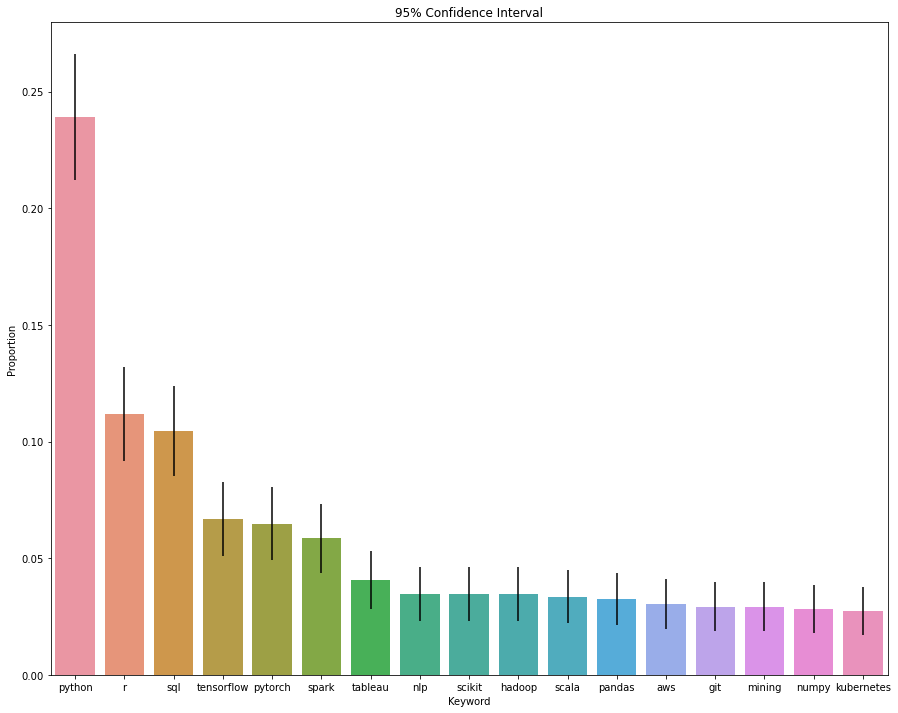

In [33]:
plt.figure(figsize=(15,12))
sb.barplot(x=keyword_data['Keyword'], y=keyword_data['Proportion'], yerr=keyword_data['ci_95%'])
plt.title('95% Confidence Interval')
# plt.savefig('save_as_a_png.png')

Text(0.5, 1.0, '68% Confidence Interval')

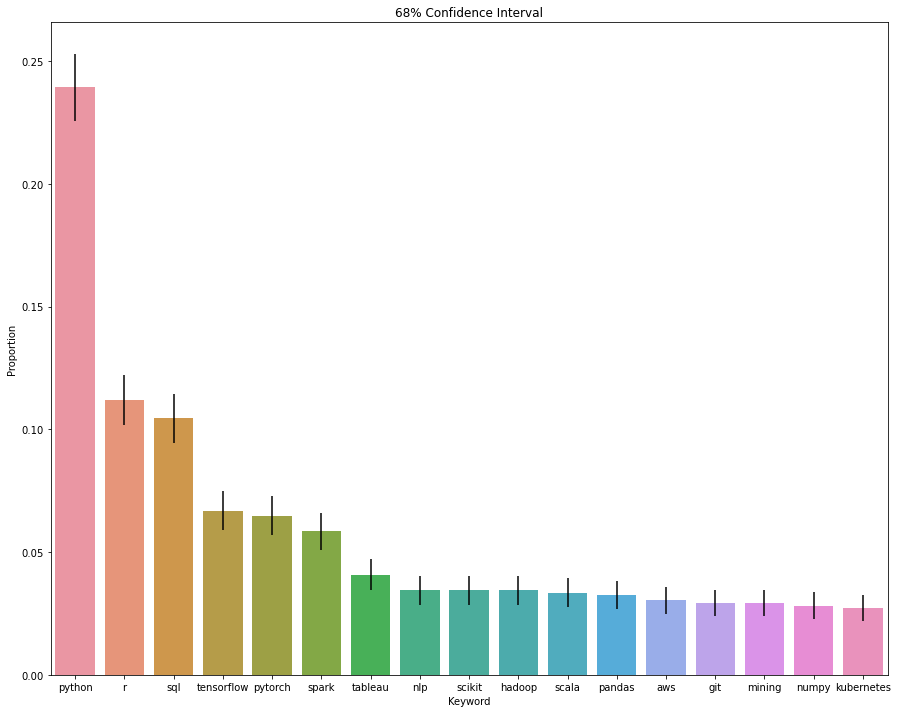

In [35]:
plt.figure(figsize=(15,12))
sb.barplot(x=keyword_data['Keyword'], y=keyword_data['Proportion'], yerr=keyword_data['ci_68%'])
plt.title('68% Confidence Interval')